# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [114]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


Verifica-se que as colunas Age e Income precisam ser ajustadas. Vamos começar pela segunda.  
Ao ler os dados da coluna, nota-se que por conta de como os dados estão escritos, o pandas o entende como do tipo object. Assim, primeiro será preciso fazer a substituição dos pontos e vírgulas para somente então convertê-los para o tipo float.

In [116]:
df['Income'] = df['Income'].str.replace('.', '').str.replace(',', '.').astype(float)
display(df.info())
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 10.4+ KB


None

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,50000.0,Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,100000.0,Master's Degree,Married,2,Owned,High
2,35.0,Female,75000.0,Doctorate,Married,1,Owned,High
3,40.0,Male,125000.0,High School Diploma,Single,0,Owned,High
4,45.0,Female,100000.0,Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,150000.0,Master's Degree,Married,0,Owned,High
6,26.0,Female,40000.0,Associate's Degree,Single,0,Rented,Average
7,31.0,Male,60000.0,Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,80000.0,Master's Degree,Married,2,Owned,High
9,NaN,Male,105000.0,Doctorate,Single,0,Owned,High


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [117]:
(df.isnull().sum()/df.shape[0])*100

,0
Age,20.731707
Gender,0.000000
Income,0.000000
Education,0.000000
Marital Status,0.000000
Number of Children,0.000000
Home Ownership,0.000000
Credit Score,0.000000


A coluna Age possui um número grande de dados faltantes. Portanto a simples exclusão reduziria muito o dataset. A opção será por fazer a substituição dos dados nulos. Primeiro, será verificada a distribuição e presença de outliers nessa coluna.

In [118]:
fig = px.box(df, x='Age', title='Distribuição da coluna Age')
fig.update_layout(width=600, height=300)
fig.show()

In [119]:
display(f"Média da coluna Age: {df['Age'].mean()}")

'Média da coluna Age: 37.50769230769231'

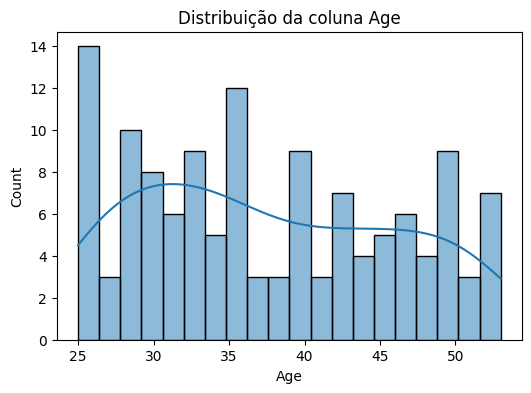

In [120]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribuição da coluna Age')
plt.show()

Dada a distribuição, a proximidade entre média e mediana e a ausência de outliers, prosseguiremos com a substituição dos dados faltantes pela mediana e, em seguida, faremos a conversão para o tipo int.

In [121]:
df.fillna(df['Age'].median(), inplace=True)
df['Age'] = df['Age'].astype(int)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 164 non-null    int64  
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 10.4+ KB


None

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [122]:
for column in df.columns:
  if df[column].dtype == 'object':
    unique_values = df[column].unique()
    print(f"Valores únicos na coluna '{column}': {unique_values}")

Valores únicos na coluna 'Gender': ['Female' 'Male']
Valores únicos na coluna 'Education': ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
Valores únicos na coluna 'Marital Status': ['Single' 'Married']
Valores únicos na coluna 'Home Ownership': ['Rented' 'Owned']
Valores únicos na coluna 'Credit Score': ['High' 'Average' 'Low']


Não temos valores incorretos, mas podemos fazer a conversão para caixa baixa de todas as colunas.

In [123]:
for column in df.columns:
  if df[column].dtype == 'object':
    df[column] = df[column].str.lower()
    unique_values = df[column].unique()
    print(f"Valores únicos na coluna '{column}': {unique_values}")

Valores únicos na coluna 'Gender': ['female' 'male']
Valores únicos na coluna 'Education': ["bachelor's degree" "master's degree" 'doctorate' 'high school diploma'
 "associate's degree"]
Valores únicos na coluna 'Marital Status': ['single' 'married']
Valores únicos na coluna 'Home Ownership': ['rented' 'owned']
Valores únicos na coluna 'Credit Score': ['high' 'average' 'low']


# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [124]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.195122,83765.243902,0.652439
std,7.586619,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,36.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


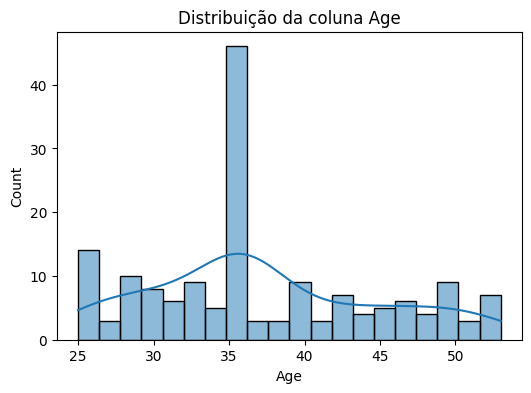

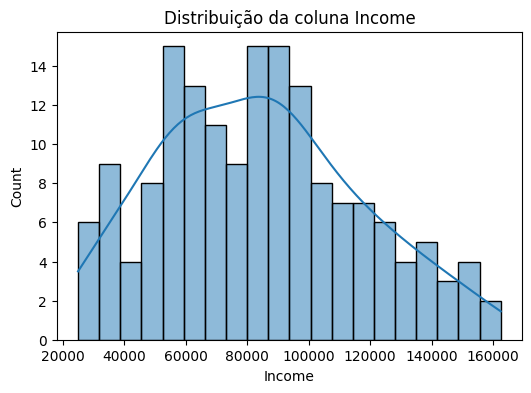

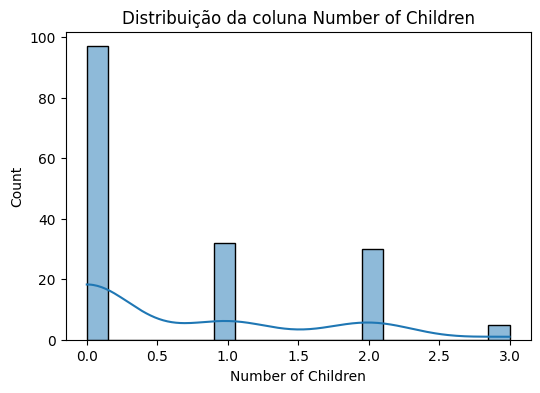

In [125]:
for column in df.columns:
  if df[column].dtype == 'int64' or df[column].dtype == 'float64':
    fig = px.box(df, x=column, title=f'Distribuição da coluna {column}')
    fig.update_layout(width=600, height=300)
    fig.show()
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=column, bins=20, kde=True)
    plt.title(f'Distribuição da coluna {column}')
    plt.show()

Para a coluna Age, vamos verificar com ose alterou a média a pós inclusão da mediana nos dados nulos.

In [126]:
display(f"Média da coluna Age: {df['Age'].mean()}")

'Média da coluna Age: 37.19512195121951'

Houve uma discreta redução, então nosso dataset, apesar do número maior de entradas do valor da mediana comparado com o gráfico anterior ao tratamento dos nulos, ainda mantém uma distribuição parecida. Dessa forma, podemos concluir que a idade da base de clientes está concentrada entre 31 e os 43 anos de idade, com um pico maior por volta dos 37 anos.

A coluna Income apresenta uma distribuição próxima da normal e sem outliers. Observa-se também que há uma maior concentração abaixo da mediana de 83,7k.

A coluna Children nos mostra, a princípio, a presença de um outlier. Porém, considerando que o valor de 3 não é tão distante do upper fence dos dados e que ainda faz sentido para nosso dataset, será optado por não tratá-lo. Observa-se também que a maior parte dos clientes do dataset possuem 0 ou 1 filho.

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

In [127]:
for column in df.columns:
  if df[column].dtype == 'object':
    fig = px.histogram(df,
                       x=column,
                       color=column,
                       title=f'Distribuição da coluna {column}')
    fig.update_layout(width=600, height=400)
    fig.update_layout(showlegend=False)
    fig.show()

Verifica-se que há um bom equilíbrio no dataset entre os gêneros masculino e feminino, com ligeira vantagem para o segundo. Assim como também observamos fenômeno semelhante na coluna Marital Status, com discreta maioria para os casados.

Na base analisada a maioria dos clientes possuem pelo menos diploma de nível superior, com parte significativa de diplomas acima disso.

A maioria dos clientes da base é proprietária de imóvel.

A coluna preditora Credit Score também possui uma distribuição desigual, com um número muito maior de clientes com credit score alto em comparação com os demais. Nossa base precisará ser balanceada posteriormente para a realização do treinamento do modelo.

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

As colunas que possuiam outliers já foram abordadas nos tópicos anteriores.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



In [128]:
idade_por_status_civil = df.groupby('Age')['Marital Status'].value_counts().reset_index()

fig = px.line(idade_por_status_civil,
              x='Age',
              y='count',
              color='Marital Status',
              title='Idade por Status Civil')
fig.update_layout(width=600, height=400)
fig.show()

Uma relação que é possível verificar entre idade e status civil é que quanto mais jovem é o indivíduo, maior a chance de ser solteiro e quanto mais velho, maior a chance de ser casado.

In [129]:
credit_score_por_escolaridade = df.groupby('Education')['Credit Score'].value_counts().reset_index()

ordem_nivel_educacional = ['high school diploma', "associate's degree", "bachelor's degree", "master's degree", 'doctorate']
ordem_credit_score = ['low', 'average', 'high']

fig = px.histogram(credit_score_por_escolaridade,
                   x='Education',
                   y='count',
                   color='Credit Score',
                   title='Credit Score por Escolaridade',
                   barmode='group',
                   category_orders={'Education': ordem_nivel_educacional, 'Credit Score': ordem_credit_score})
fig.update_layout(width=600, height=400)
fig.show()

Observa-se que escolaridade mais alta também está relacionada a um credit score mais alto.

In [130]:
salario_por_idade = df.groupby('Age')['Income'].mean().reset_index()

fig = px.line(salario_por_idade,
              x='Age',
              y='Income',
              title='Média salarial por Idade')

fig.update_layout(width=600, height=400)
fig.show()

Pelo gráfico, observa-se que há uma tendência de que o salário aumente conforme o avançar da idade. Dessa forma, é possível concluir que a idade pode ter influência no salário.

In [131]:
salario_por_credit_score = df.groupby('Credit Score')['Income'].mean().reset_index()

fig = px.histogram(salario_por_credit_score,
                   x='Credit Score',
                   y='Income',
                   color='Credit Score',
                   title='Média salarial por Credit Score',
                   category_orders={'Credit Score': ordem_credit_score})

fig.update_layout(width=600, height=400)
fig.update_layout(showlegend=False)
fig.show()

Salários mais altos são um fator positivo para que o credit score seja mais alto também.

In [132]:
credit_score_por_casa_propria = df.groupby('Home Ownership')['Credit Score'].value_counts().reset_index()

fig = px.histogram(credit_score_por_casa_propria,
                   x='Home Ownership',
                   y='count',
                   color='Credit Score',
                   title='Credit Score por Casa Própria',
                   barmode='group',
                   category_orders={'Credit Score': ordem_credit_score})

fig.update_layout(width=600, height=400)
fig.show()

Verifica-se que quase a totalidade dos clientes que possuem casa própria também contam com um credit score maior. Parece ser um fator muito relevante na avaliação de risco do cliente.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

**- Existe alguma diferença de credit score entre os gêneros?**

In [133]:
credit_score_por_idade = df.groupby('Gender')['Credit Score'].value_counts().reset_index()

fig = px.histogram(credit_score_por_idade,
                   x='Gender',
                   y='count',
                   color='Credit Score',
                   title='Credit Score por Gênero',
                   barmode='group',
                   category_orders={'Credit Score': ordem_credit_score})

fig.update_layout(width=600, height=400)
fig.show()

Apesar de bem equilibrada a distribuição de gênero na base analisada, há uma chance maior de que pessoas do gênero feminino tenham um credit score menor.

**- Há relação de credit score com a idade?**

In [134]:
credit_score_por_idade = df.groupby('Age')['Credit Score'].value_counts().reset_index()

fig = px.line(credit_score_por_idade,
              x='Age',
              y='count',
              color='Credit Score',
              title='Credit Score por Idade',
              category_orders={'Credit Score': ordem_credit_score})

fig.update_layout(width=600, height=400)

Credit score mais baixos se concentram nos clientes cuja idade está abaixo da mediana da base analisada. A idade parece ser também um fator relevante para o risco de crédito.

**- Pessoas casadas obtém melhor credit score?**

In [135]:
credit_score_por_estado_civil = df.groupby('Marital Status')['Credit Score'].value_counts().reset_index()

fig = px.histogram(credit_score_por_estado_civil,
                   x='Marital Status',
                   y='count',
                   color='Credit Score',
                   title='Credit Score por Estado Civil',
                   barmode='group',
                   category_orders={'Credit Score': ordem_credit_score})

fig.update_layout(width=600, height=400)
fig.show()

Sim, pessoas casadas também têm melhor chance de obter um credit score alto.

**- Níveis educacionais maiores estão relacionados com maiores salários?**

In [136]:
salario_por_escolaridade = df.groupby('Education')['Income'].mean().reset_index()

fig = px.histogram(salario_por_escolaridade,
                   x='Education',
                   y='Income',
                   color='Education',
                   title='Média salarial por Escolaridade',
                   category_orders={'Education': ordem_nivel_educacional})

fig.update_layout(width=600, height=400)
fig.update_layout(showlegend=False)
fig.show()

Observamos que há uma maior chance de que com níveis educacionais maiores os salários também sejam. Porém chama a atenção que os salários do diploma mais baixo tenha média salarial parecida com dois níveis acima.  
Esse salário mais alto de quem tem diploma de high school comparado com quem tem associate's degree se ecoa também na análise feita relacionando o credit score com o nível de escolaridade. Apesar de quem tem diploma de high school ter maiores chances de ter um credit score mais baixo, o salário mais alto pode compensar essa perda se comparado com aqueles que têm associate's degree.

Conclui-se poranto que fatores indicativos de maior estabilidade na vida e maior renda são fatores importantes na avaliação de crédito dos clientes.

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [137]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

fig = px.imshow(correlation_matrix,
                color_continuous_scale='RdBu',
                zmin=-1,
                zmax=1,
                title='Matriz de Correlação')
fig.update_layout(width=600, height=400)
fig.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

Como fora observado nos gráficos, as variáveis Age e Income possuem de fato uma forte correlação positiva, agora confirmada pelo valor de 0,62. Ainda será preciso fazer outras transformações para verificar as variáveis categóricas.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

Para a coluna Gender será realizado o tratamento por Label Encoder, pois, por possuír apenas duas categorias, a técnica economiza memória.  
Já para Home Ownership, Education e Credit Score será utilizado o Ordinal Encoder, uma vez que a codificação para a criação de categorias ordenadas me pareceu ser mais simples por essa técnica.

In [138]:
label_encoder = LabelEncoder()
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])

In [139]:
ordinal_encoder = OrdinalEncoder(categories=[['rented', 'owned']])
df['Home Ownership_encoded'] = ordinal_encoder.fit_transform(df[['Home Ownership']]).astype(int)

In [140]:
ordinal_encoder = OrdinalEncoder(categories=[ordem_nivel_educacional])
df['Education_encoded'] = ordinal_encoder.fit_transform(df[['Education']]).astype(int)

In [141]:
ordinal_encoder = OrdinalEncoder(categories=[ordem_credit_score])
df['Credit Score_encoded'] = ordinal_encoder.fit_transform(df[['Credit Score']]).astype(int)

In [142]:
df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,Gender_encoded,Home Ownership_encoded,Education_encoded,Credit Score_encoded
0,25,female,50000.0,bachelor's degree,single,0,rented,high,0,0,2,2
1,30,male,100000.0,master's degree,married,2,owned,high,1,1,3,2
2,35,female,75000.0,doctorate,married,1,owned,high,0,1,4,2
3,40,male,125000.0,high school diploma,single,0,owned,high,1,1,0,2
4,45,female,100000.0,bachelor's degree,married,3,owned,high,0,1,2,2
5,50,male,150000.0,master's degree,married,0,owned,high,1,1,3,2
6,26,female,40000.0,associate's degree,single,0,rented,average,0,0,1,1
7,31,male,60000.0,bachelor's degree,single,0,rented,average,1,0,2,1
8,36,female,80000.0,master's degree,married,2,owned,high,0,1,3,2
9,36,male,105000.0,doctorate,single,0,owned,high,1,1,4,2


In [143]:
for colum in df.columns:
  if df[colum].dtype == 'object':
    df.drop(colum, axis=1, inplace=True)

df.head(10)

,Age,Income,Number of Children,Gender_encoded,Home Ownership_encoded,Education_encoded,Credit Score_encoded
0,25,50000.0,0,0,0,2,2
1,30,100000.0,2,1,1,3,2
2,35,75000.0,1,0,1,4,2
3,40,125000.0,0,1,1,0,2
4,45,100000.0,3,0,1,2,2
5,50,150000.0,0,1,1,3,2
6,26,40000.0,0,0,0,1,1
7,31,60000.0,0,1,0,2,1
8,36,80000.0,2,0,1,3,2
9,36,105000.0,0,1,1,4,2


Agora apenas será removido o sufixo "_encoded" para facilitar a visualização.

In [144]:
df.columns = [col.replace('_encoded', '') for col in df.columns]

df.head(10)

,Age,Income,Number of Children,Gender,Home Ownership,Education,Credit Score
0,25,50000.0,0,0,0,2,2
1,30,100000.0,2,1,1,3,2
2,35,75000.0,1,0,1,4,2
3,40,125000.0,0,1,1,0,2
4,45,100000.0,3,0,1,2,2
5,50,150000.0,0,1,1,3,2
6,26,40000.0,0,0,0,1,1
7,31,60000.0,0,1,0,2,1
8,36,80000.0,2,0,1,3,2
9,36,105000.0,0,1,1,4,2


**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

In [145]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

fig = px.imshow(correlation_matrix,
                color_continuous_scale='RdBu',
                zmin=-1,
                zmax=1,
                title='Matriz de Correlação')
fig.update_layout(width=800, height=600)
fig.show()

Observam-se diversas correlações fortemente positivas para a variável preditora credit score. Apenas Gender e o Number of Children podem ser consideradas mais fracas, mas ainda positivas.  
Apesar de Gender ser uma variável com correlação mais fraca em relação à Credit Score, ela tem uma correlação importante com Income, que, por sua vez, tem correlação forte com Credit Score. Dessa forma, Gender se mantém relevante para o treinamento do nosso modelo.


**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [146]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Credit Score', axis=1), df['Credit Score'], test_size=0.25, random_state=42)

In [152]:
print(f"Shape da base de treino: {X_train.shape}")
print(f"Shape da base de teste: {X_test.shape}")

Shape da base de treino: (123, 6)
Shape da base de teste: (41, 6)


In [153]:
print(f"Shape da coluna de treino: {y_train.shape}")
print(f"Shape da coluna de teste: {y_test.shape}")

Shape da coluna de treino: (123,)
Shape da coluna de teste: (41,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

In [155]:
fig = px.histogram(y_train,
                   x='Credit Score',
                   title='Distribuição da coluna Credit Score em X_train')
fig.update_layout(width=600, height=400)
fig.show()

Não está balanceada. Será necessário fazer o balanceamento das categorias por SMOTE.

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [158]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [160]:
print("Distribuição das classes após o balanceamento:")
print(y_train_balanced.value_counts())
print(f"Shape da base de treino após o balanceamento: {X_train_balanced.shape}")

Distribuição das classes após o balanceamento:
Credit Score
1    84
0    84
2    84
Name: count, dtype: int64
Shape da base de treino após o balanceamento: (252, 6)
